Ogólne podpowiedzi do wszelkich dalszych raportów:

1. Najważniejsze w każdej odpowiedzi są interpretacje uzyskanych rezultatów, wnioski i uzasadnienia. Zamieszczenie rezultatów liczbowych służy uzasadnieniu wniosków; surowe rezultaty bez interpretacji autora są bezwartościowe.
Zatem nie stosujemy takiego podejścia: "Zamieściłem wykres i widzę na nim, że trafność rośnie, więc nie muszę tego pisać" albo "Podałem dwie liczby i widzę z nich, że jedna klasa jest 5x bardziej liczna od drugiej, więc nie muszę tego pisać".
Nie podajemy też samych wniosków tekstowych bez podparcia konkretnymi wynikami.
2. Wykresy zwykle lepiej i zwięźlej pokazują wyniki, niż duże tabele liczb.
3. Aby uniknąć pustych marginesów na wykresach, do każdego z nich używaj tight layout.
4. Nadawaj informatywne nazwy plikom z obrazkami ("drzewa_dec_trafnosc.png" zamiast "wykres3.png" albo "Download_18.png").
5. Podając liczby zwracaj uwagę na odpowiednia (uzasadnioną) liczbę miejsc znaczących – zwykle nie potrzeba 5, 10, a tym bardziej 15 miejsc po przecinku.
6. Unikaj nieuzasadnionych, subiektywnych określeń ("dużo", "bardzo słabe") – żeby podeprzeć takie oceny, podawaj również konkretne wartości.
7. Wyrażaj się precyzyjnie i jednoznacznie; używaj terminologii uczenia maszynowego ("atrybuty" zamiast "kolumny", "przypadek" zamiast "element").
8. Unikaj mieszania języków ("clustrowanie", "model overfituje", "w drzewie były dwa splity", "przypadki nie mają labeli", "dane olabelowane", "zaawansowane setupy", "wartości zostały przeprocesowane", "w tym datasecie") – jeśli koniecznie chcesz użyć angielskiego terminu, bo nie ma dobrego polskiego odpowiednika, nie odmieniaj go i pisz takie wyjątkowe słowa italikiem ("zachodzi overfitting" – chociaż tu akurat jest dobry odpowiednik).
9. Przygotowuj odpowiedzi samodzielnie (trudno "odzobaczyć" to, co już się zobaczyło – ryzyko plagiatu).
10. Kopiowanie i wklejanie na eKursach: jeśli nie działa Ctrl-C/Ctrl-V, spróbuj Ctrl-Insert/Shift-Insert.
Przypomnij sobie z wykładów oraz z wcześniejszych przedmiotów nawiązujących do tematyki uczenia maszynowego i analizy danych, jakie techniki służą do rozwiązania zadania regresji dla wielowymiarowych danych. To zadanie nie podlega ocenie; zastanów się i wpisz tutaj nazwy wszystkich algorytmów, które przychodzą Ci do głowy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Zadanie 1
Przypomnij sobie z wykładów oraz z wcześniejszych przedmiotów nawiązujących do tematyki uczenia maszynowego i analizy danych, jakie techniki służą do rozwiązania zadania regresji dla wielowymiarowych danych. To zadanie nie podlega ocenie; zastanów się i wpisz tutaj nazwy wszystkich algorytmów, które przychodzą Ci do głowy.

Regresja liniowa, Regresja wielomianowa, Ridge Regression, Regresja Lasso, Regresja ElasticNet, Regresja logistyczna, Random Forest, XGBoost, Support Vector Regression (SVR), KNN, PCR, Drzewa decyzyjne.

## Zadanie 2
Pobierz zbiór danych o nazwie odpowiadającej Twojemu numerowi albumu. Te dane dotyczą wykrywania anomalii (zakłóceń) w sygnale audio; każdy wiersz opisuje inne wystąpienie anomalii, a ostatnia kolumna to szerokość zakłócenia (liczba próbek). Pozostałe kolumny to różne statystyki zebrane z otoczenia zakłócenia; pierwszy wiersz zawiera skrótowe nazwy kolumn. Szczegółowy opis znaczenia atrybutów znajdziesz tutaj. Możesz wczytać plik używając dane = np.genfromtxt(nazwa_pliku, skip_header=1) albo parametru names=True (wtedy uwaga).

Przeprowadź jego wstępną eksplorację: liczba i rodzaje atrybutów, ich zakresy i rozkłady wartości. Pokaż rozkłady wartości wszystkich atrybutów warunkowych obok siebie na jednym szerokim wykresie pudełkowym lub skrzypcowym; na osi poziomej umieść nazwy atrybutów. Opisując wnioski (wystarczy kilka zdań) możesz pogrupować (o ile to możliwe) atrybuty pisząc np. "73 atrybuty są takie a takie, 22 atrybuty charakteryzują się tym a tym, wyjątkowy jest atrybut taki a taki", itp.

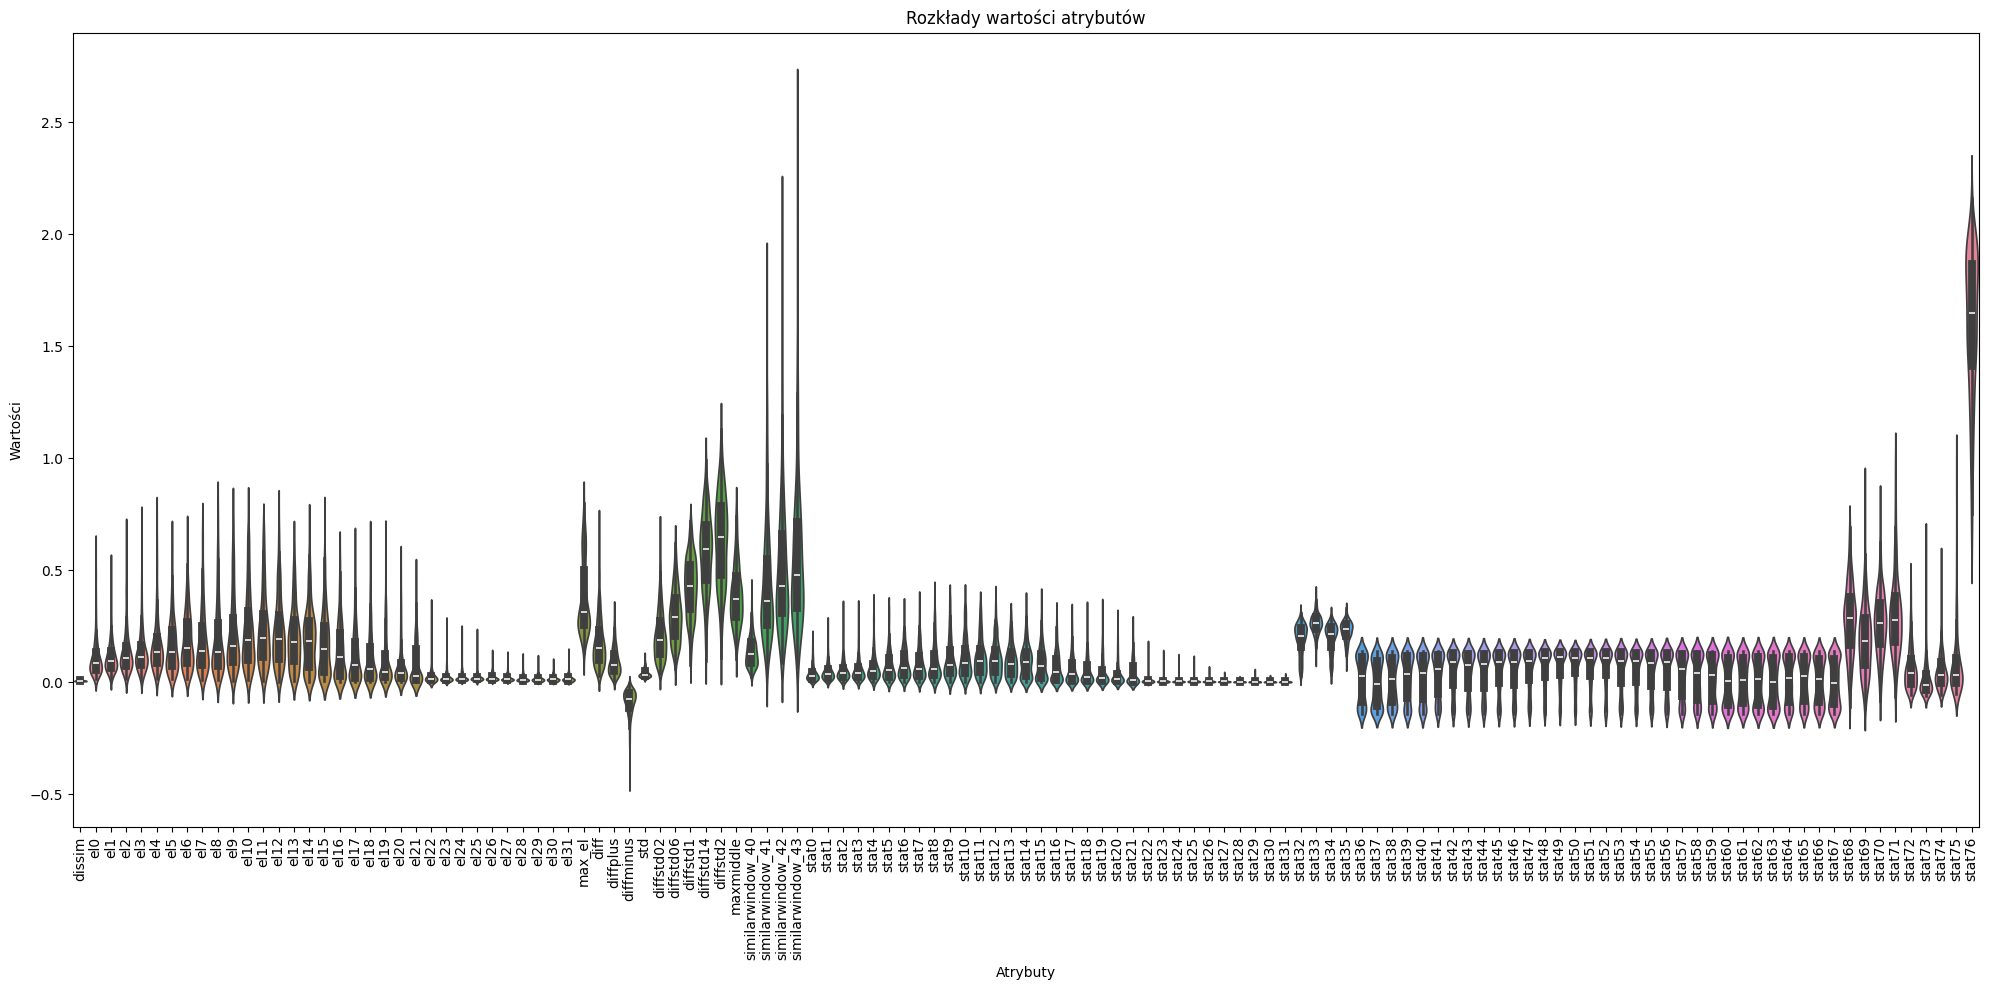

Liczba atrybutów: 125

Zakresy atrybutów:
dissim: Min: 0.0035304, Max: 0.023424, Std: 0.0031277370913194206
el0: Min: 0.01277, Max: 0.60601, Std: 0.08293464321514848
el1: Min: 0.015636, Max: 0.52272, Std: 0.07958016132699584
el2: Min: 0.015575, Max: 0.66922, Std: 0.10318670905328976
el3: Min: 0.0083909, Max: 0.72858, Std: 0.09318541045558913
el4: Min: 0.013502, Max: 0.7568, Std: 0.11868144175782025
el5: Min: 0.01457, Max: 0.6444, Std: 0.12890931045308654
el6: Min: 0.014577, Max: 0.66844, Std: 0.12603262711301408
el7: Min: 0.0094351, Max: 0.71664, Std: 0.14185231967500042
el8: Min: 0.0084075, Max: 0.80024, Std: 0.16155905242183324
el9: Min: 0.0074914, Max: 0.76731, Std: 0.17009157480400558
el10: Min: 0.0085486, Max: 0.77233, Std: 0.16633978632255067
el11: Min: 0.0039167, Max: 0.70338, Std: 0.15920229476487693
el12: Min: 0.003721, Max: 0.76771, Std: 0.15192400627762767
el13: Min: 0.0058845, Max: 0.63832, Std: 0.13873846362392905
el14: Min: 0.0026023, Max: 0.71297, Std: 0.1390460533720590

In [2]:
plik = '151813-regression.txt'

try:
    dane = np.genfromtxt(plik, delimiter='\t', names=True)
except FileNotFoundError:
    print(f"Błąd: Plik '{plik}' nie został znaleziony.")
    exit()

dane_df = pd.DataFrame(dane)

# Usunięcie ostatniej kolumny 'class'
if not dane_df.empty:
    ostatnia_kolumna = dane_df.columns[-1]
    dane_df_features = dane_df.iloc[:, :-1]
else:
    print("DataFrame jest pusty, nie można usunąć kolumny.")
    exit()

if not dane_df_features.empty:
    plt.figure(figsize=(20, 10))
    sns.violinplot(data=dane_df_features, orient="v")
    plt.title("Rozkłady wartości atrybutów")
    plt.ylabel("Wartości")
    plt.xlabel("Atrybuty")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Brak atrybutów do wyświetlenia na wykresie.")

print("Liczba atrybutów:", dane_df_features.shape[1])

print("\nZakresy atrybutów:")
for col in dane_df_features.columns:
    print(f"{col}: Min: {dane_df_features[col].min()}, Max: {dane_df_features[col].max()}, Std: {dane_df_features[col].std()}")

Łącznie jest 125 atrybutów, które dzielą się na około 4 klasy:


1.  dissim, el22-el31, stat22,-stat31 to atrybuty o średniej blisko zera i baardzo małym odchyleniu standradowym w granicach 0.02

2. el0 - el21, stat32-stat35 to atrybuty o nieco większej średniej i odchyleniu standardowym (około 0.1) niż te z grupy 1. Przeważają wartości dodatnie.

3. stat36-stat67 to rozkłady dwumodalne o wartościach z zakresu (-0.25, 0.25)

4. max_el-similar_window_43, stat68-stat76 to atrybuty które ciężko przyporządkować do jakiejkolwiek grupy ze względu na dużo bardziej urozmaicone wartości średnich oraz odchyleń standardowych. Na szczególną uwagę zasługuje atrybut diff_minus, który przyjmuje wartości ujemne (jak można byłoby się spodziewać po nazwie)

Każda z tych grup jest mniej więcej równoliczna.

Na wykresie przedstawiłem dokładniejsze informacje dotyczące każdego atrybutu.

## Zadanie 3
Przejrzyj dostępne metryki oceny modeli regresji. Które z nich wydają Ci się łatwe do interpretacji i dlaczego? Weź pod uwagę konkretny problem, którym się zajmujemy (predykcja ostatniej kolumny w zbiorze i znaczenie tej kolumny). Wybierz dwie metryki, które Twoim zdaniem niosą użyteczną informację o jakości modelu w rozpatrywanym problemie (jeśli masz ochotę, możesz wybrać więcej niż dwie). W kolejnych pytaniach oznaczam te metryki jako M1 i M2. Uzasadnij swój wybór.

Najbardziej intuicyjną i łatwą do interpretacji metryką jest średni błąd bezwzględny (Mean Absolute Error, MAE). Pozwala on w prosty sposób oszacować, o ile średnio model się myli przy przewidywaniu wartości dla poszczególnych przypadków – można to traktować jako „przeciętny błąd” w jednostkach celu regresji, co czyni tę metrykę bardzo zrozumiałą.

Drugą przydatną metryką jest średni błąd kwadratowy (Mean Squared Error, MSE). Jest to często stosowany wskaźnik, który dodatkowo silniej karze większe odchylenia od wartości rzeczywistych – dzięki temu pomaga lepiej ocenić, czy model popełnia duże błędy na pojedynczych przykładach, co w kontekście anomalii może mieć istotne znaczenie.

- M1 = Mean Absolute Error (MAE)
- M2 = Mean Squared Error (MSE)

Obie metryki są powszechnie stosowane, zrozumiałe i dobrze sprawdzają się w praktycznych zastosowaniach, takich jak ocena dokładności przewidywań szerokości zakłócenia w sygnale audio.

## Zadanie 4
Do dalszych testów użyjemy następujących technik:
- from sklearn import linear_model
- from sklearn import neighbors  # KNeighborsRegressor
- from sklearn.tree import DecisionTreeRegressor
- from sklearn.neural_network import MLPRegressor
- from sklearn.svm import SVR

Przejrzyj dokumentację scikit-learn i napisz, jakie jeszcze dostępne tam i znane Ci metody mogłyby posłużyć do zbudowania modeli regresji.

- from sklearn.linear_model import Ridge
- from sklearn.linear_model import Lasso
- from sklearn.linear_model import SGDRegressor
- from sklearn.kernel_ridge import KernelRidge
- sklearn.ensembles (GradientBoostingRegressor, RandomForestRegressor, VotingRegressor)

## Zadanie 5

Porównaj metody wymienione w treści poprzedniego pytania (jeśli masz ochotę, możesz dodatkowo przetestować jeszcze inne) pod kątem M1 oraz M2 dla całego zbioru danych (bez podziału uczący–testujący). Użyj domyślnych wartości parametrów (jeśli masz ochotę, poeksperymentuj z doborem parametrów; użyj też nie-domyślnych wartości wtedy, kiedy uważasz, że domyślne wartości nie mają sensu w tym zastosowaniu lub są niepoprawne). Dla SVR porównaj kernel liniowy i RBF. Dla drzew decyzyjnych użyj max_depth=2 (co się dzieje, kiedy nie ograniczymy głębokości?).

Załącz dwa wykresy (jeden dla M1 i jeden dla M2) porównujące powyższe metody. Opisz wnioski.

Fragmenty kodu, które mogą się przydać:

    print(dane.shape)
    Xregr=dane[:,0:-1]
    yregr=dane[:,-1]
    from sklearn.metrics import mean_absolute_error  # przykład dla R2 i MAE
    print_metrics = lambda regresor,opis,X,y: print(opis,':  R^2=%.2f,'%regresor.score(X, y), 
                                     ' MAE=%.1f'%mean_absolute_error(y, regresor.predict(X)))
    regr = neighbors.KNeighborsRegressor()
    regr.fit(Xregr, yregr)
    print_metrics(regr,'KNeighborsRegressor',Xregr,yregr)

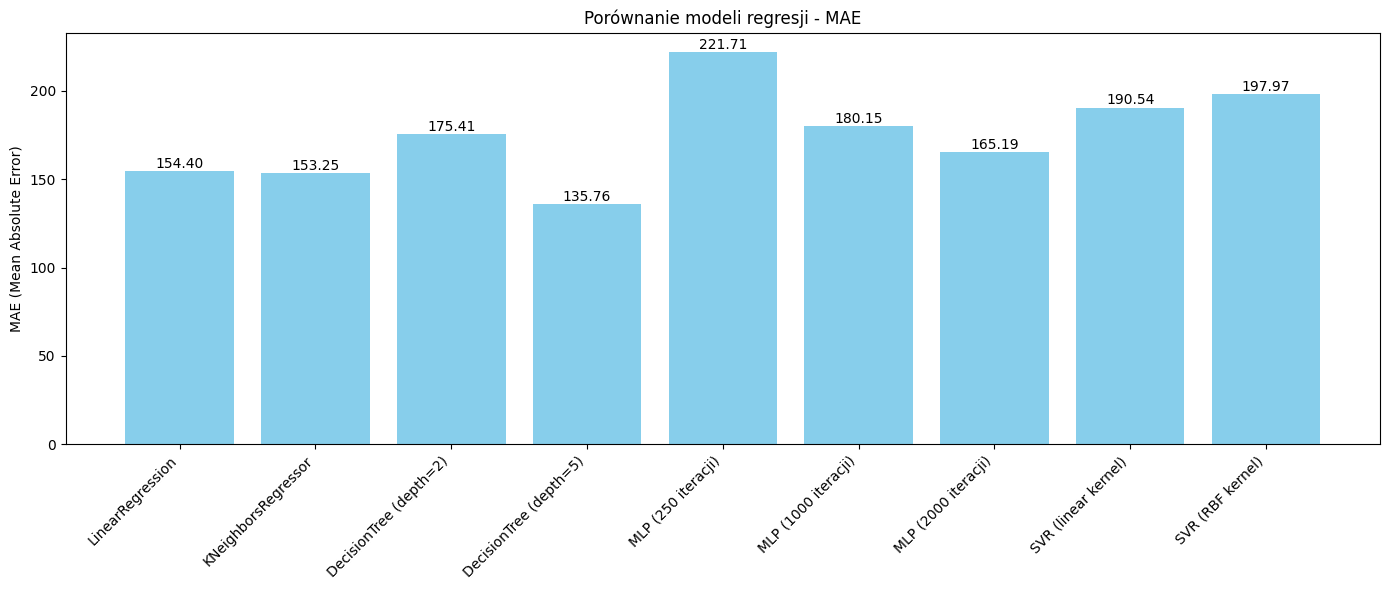

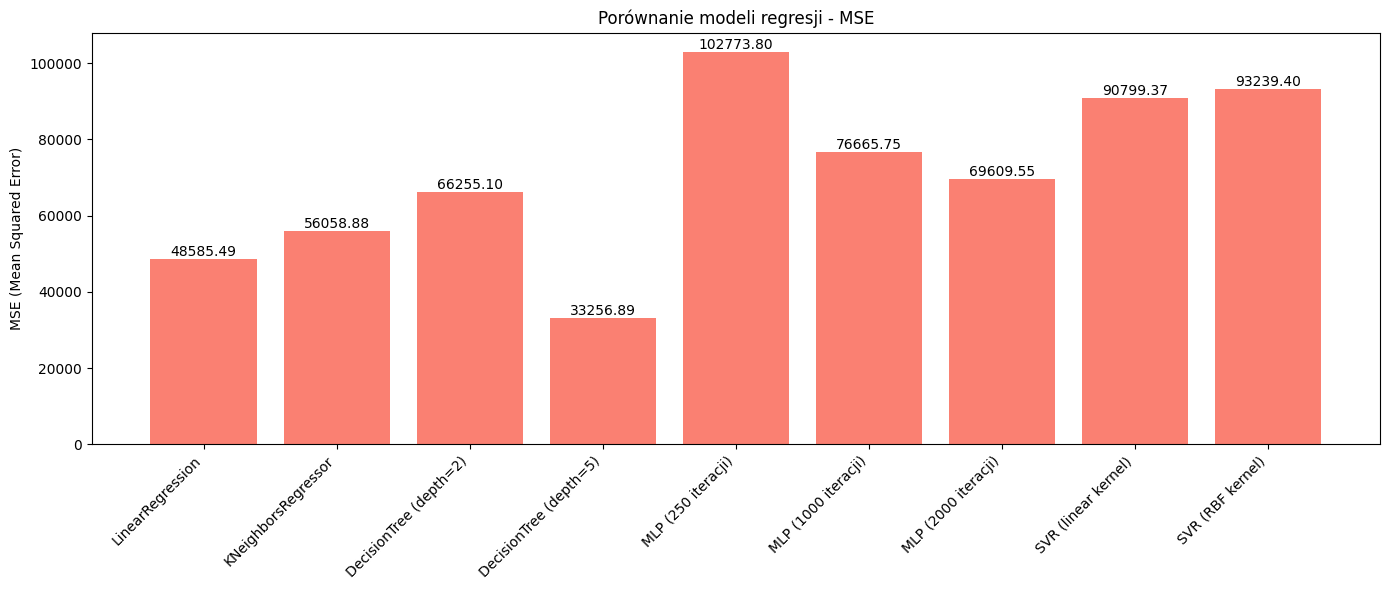

In [3]:
from sklearn import linear_model, neighbors, tree, neural_network, svm
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = dane_df.iloc[:, :-1].values
y = dane_df.iloc[:, -1].values

regresory = {
    "LinearRegression": linear_model.LinearRegression(),
    "KNeighborsRegressor": neighbors.KNeighborsRegressor(),
    "DecisionTree (depth=2)": tree.DecisionTreeRegressor(max_depth=2),
    "DecisionTree (depth=5)": tree.DecisionTreeRegressor(max_depth=5),
    "MLP (250 iteracji)": neural_network.MLPRegressor(max_iter=250, random_state=0),
    "MLP (1000 iteracji)": neural_network.MLPRegressor(max_iter=1000, random_state=0),
    "MLP (2000 iteracji)": neural_network.MLPRegressor(max_iter=2000, random_state=0),
    "SVR (linear kernel)": svm.SVR(kernel='linear'),
    "SVR (RBF kernel)": svm.SVR(kernel='rbf'),
}

mae_results = {}
mse_results = {}

for name, model in regresory.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    mae_results[name] = mean_absolute_error(y, y_pred)
    mse_results[name] = mean_squared_error(y, y_pred)

# Wykres MAE
plt.figure(figsize=(14, 6))
bars = plt.bar(mae_results.keys(), mae_results.values(), color='skyblue')
plt.ylabel("MAE (Mean Absolute Error)")
plt.title("Porównanie modeli regresji - MAE")
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Wykres MSE
plt.figure(figsize=(14, 6))
bars = plt.bar(mse_results.keys(), mse_results.values(), color='salmon')
plt.ylabel("MSE (Mean Squared Error)")
plt.title("Porównanie modeli regresji - MSE")
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


Na wykresach MAE (M1) i MSE (M2) przedstawiłem, jak zmieniają się wartości metryk w zależności od zastosowanego modelu regresji. Niektóre wyniki można uznać za odstające i odrzucić przy analizie – na przykład bardzo niskie wartości MAE i MSE uzyskane przez drzewo decyzyjne o maksymalnej głębokości równej 5. To efekt przeuczenia, które jest naturalne w sytuacji, gdy model uczony jest na całym zbiorze danych bez wykorzystania zbioru testowego czy walidacyjnego – w takim przypadku drzewo może stworzyć osobny liść dla każdego przykładu.

Podobnie zbyt wysokie wartości metryk uzyskane dla MLPRegressora przy 250 iteracjach również nie odzwierciedlają realnej skuteczności modelu – liczba iteracji jest zbyt mała, by model mógł nauczyć się bardziej złożonych zależności w danych.

Wszystkie modele uruchomione zostały z domyślnymi wartościami parametrów, z wyjątkiem tych, gdzie jawnie określono liczbę iteracji lub głębokość drzewa.

W przypadku metryki MAE wartości były stosunkowo zbliżone dla większości modeli. Najniższy błąd – 153,52 – osiągnął model KNeighborsRegressor, natomiast najwyższy – 197,97 – SVR z jądrem RBF.

Znacznie większe zróżnicowanie wystąpiło dla metryki MSE, co wynika z jej wrażliwości na duże błędy. Najlepszy wynik (najmniejsza wartość MSE: 48 585,49) uzyskał LinearRegression, a najgorszy (93 239,40) SVR z jądrem RBF.

## Zadanie 6

Które z metod wykorzystanych w poprzednim zadaniu wymagają normalizacji/standaryzacji danych i nie powinniśmy ich używać na surowych danych? Dlaczego tak jest, w czym tkwi niebezpieczeństwo? Rozszerz wykresy z poprzedniego zadania o wyniki poprawnie użytych metod oraz zinterpretuj efekt wykorzystania normalizacji.

Fragmenty kodu, które mogą się przydać:

    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler  # albo inny, bardziej odpowiedni
    regr = make_pipeline(StandardScaler(), SVR(ewentualniejakiesparametry))

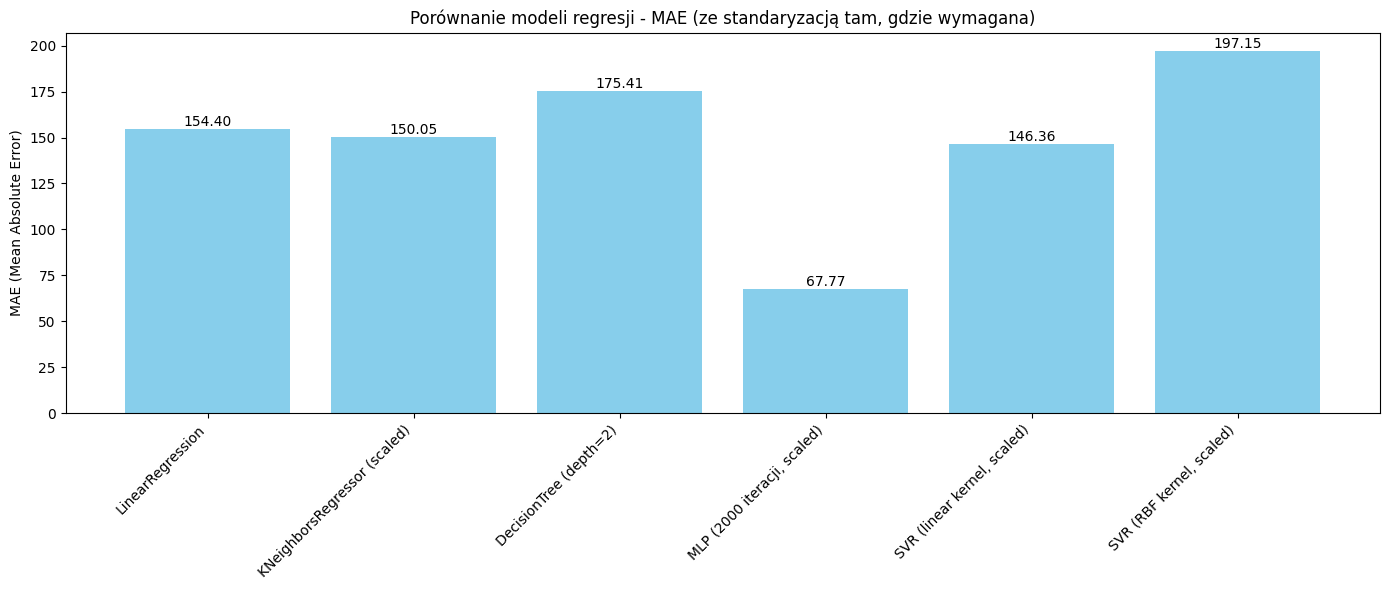

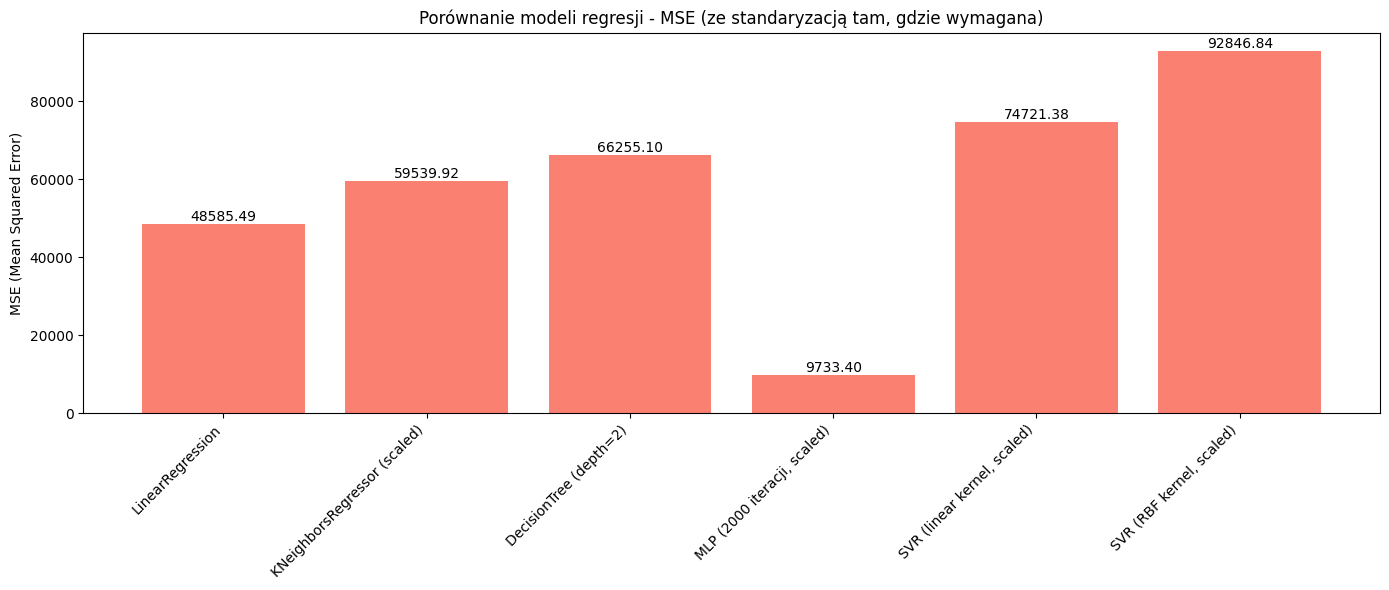

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = dane_df.iloc[:, :-1].values
y = dane_df.iloc[:, -1].values

regresory = {
    "LinearRegression": linear_model.LinearRegression(),
    "KNeighborsRegressor (scaled)": make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor()),
    "DecisionTree (depth=2)": tree.DecisionTreeRegressor(max_depth=2),
    "MLP (2000 iteracji, scaled)": make_pipeline(StandardScaler(), neural_network.MLPRegressor(max_iter=2000, random_state=0)),
    "SVR (linear kernel, scaled)": make_pipeline(StandardScaler(), svm.SVR(kernel='linear')),
    "SVR (RBF kernel, scaled)": make_pipeline(StandardScaler(), svm.SVR(kernel='rbf')),
}

mae_results = {}
mse_results = {}

for name, model in regresory.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    mae_results[name] = mean_absolute_error(y, y_pred)
    mse_results[name] = mean_squared_error(y, y_pred)

# Wykres MAE
plt.figure(figsize=(14, 6))
bars = plt.bar(mae_results.keys(), mae_results.values(), color='skyblue')
plt.ylabel("MAE (Mean Absolute Error)")
plt.title("Porównanie modeli regresji - MAE (ze standaryzacją tam, gdzie wymagana)")
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Wykres MSE
plt.figure(figsize=(14, 6))
bars = plt.bar(mse_results.keys(), mse_results.values(), color='salmon')
plt.ylabel("MSE (Mean Squared Error)")
plt.title("Porównanie modeli regresji - MSE (ze standaryzacją tam, gdzie wymagana)")
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


Na wykresach zostały usunięte wartości odstające dla modeli, o których wspominałem w poprzednim zadaniu. W związku z tym drzewo decyzyjne zostało ograniczone do maksymalnej głębokości 2, a sieć MLP trenowana była przez 2000 iteracji.

Zarówno w przypadku MAE, jak i MSE, rozkład wyników jest zbliżony, aczkolwiek standaryzacja poprawiła wartości metryk dla każdego modelu. Najsłabsze rezultaty ponownie uzyskał model SVR z funkcją jądra RBF. Z kolei zdecydowanie najlepsze wyniki osiągnęła sieć MLP, która dla obu metryk wypada kilkukrotnie lepiej niż pozostałe metody.

Należy jednak podchodzić do tych rezultatów z ostrożnością – zgodnie z wytycznymi z zadania 5 nie zastosowano ani podziału zbioru na treningowy i testowy, ani walidacji krzyżowej. W związku z tym istnieje duże prawdopodobieństwo, że doszło do przeuczenia modeli. Rzetelną ocenę ich jakości będzie można przeprowadzić dopiero po realizacji zadania 9.

# Zadanie 7

Wybierz Twoim zdaniem najlepszy model regresji. Napisz, na jakiej podstawie go wybrałeś/wybrałaś i co nam daje takie kryterium "najlepszości". Załącz wykres, w którym na osi poziomej są faktyczne wartości zmiennej zależnej, a na osi pionowej – to, co przewiduje wybrany model regresji. Postaraj się, żeby wykres był czytelny i przydatny (zamiast zaproponowanego wykresu możesz przygotować inny, który lepiej pokaże błędy popełniane przez model na poszczególnych przypadkach) oraz opisz wnioski z tej wizualizacji.

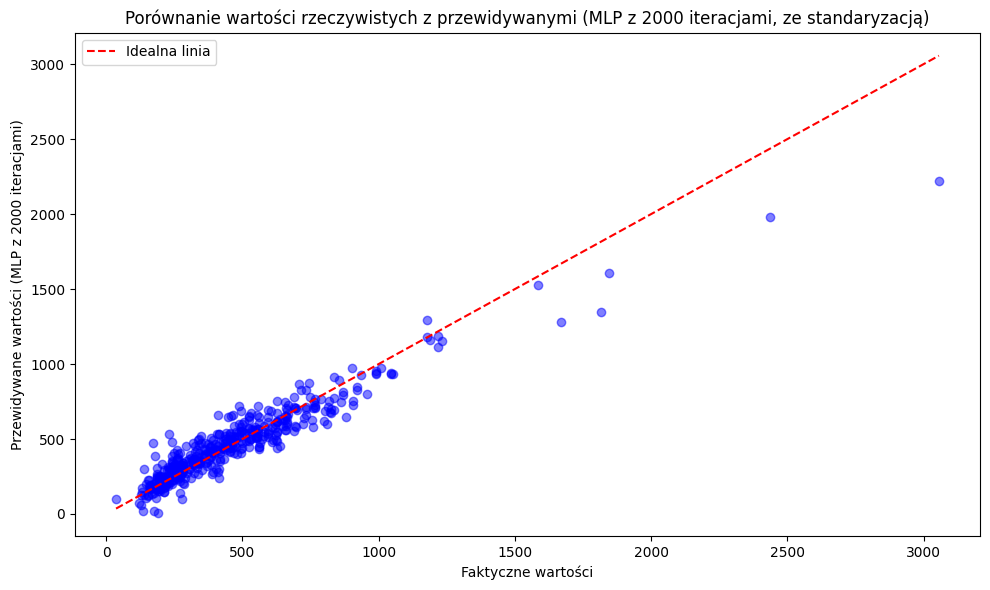

MAE (Mean Absolute Error) dla MLP z 2000 iteracjami: 67.77
MSE (Mean Squared Error) dla MLP z 2000 iteracjami: 9733.40


In [5]:
X = dane_df.iloc[:, :-1].values
y = dane_df.iloc[:, -1].values


mlp_model = make_pipeline(StandardScaler(), neural_network.MLPRegressor(max_iter=2000, random_state=0))
mlp_model.fit(X, y)
y_pred_mlp = mlp_model.predict(X)

mae_mlp = mean_absolute_error(y, y_pred_mlp)
mse_mlp = mean_squared_error(y, y_pred_mlp)

# Wykres porównania wartości rzeczywistych z przewidywanymi
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_mlp, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Idealna linia')
plt.xlabel("Faktyczne wartości")
plt.ylabel("Przewidywane wartości (MLP z 2000 iteracjami)")
plt.title("Porównanie wartości rzeczywistych z przewidywanymi (MLP z 2000 iteracjami, ze standaryzacją)")
plt.legend()
plt.tight_layout()
plt.show()

print(f"MAE (Mean Absolute Error) dla MLP z 2000 iteracjami: {mae_mlp:.2f}")
print(f"MSE (Mean Squared Error) dla MLP z 2000 iteracjami: {mse_mlp:.2f}")


Wybrałem model MLP, ponieważ uzyskał on najlepsze wyniki w poprzednich porównaniach. Dodatkowo zauważyłem, że wartość błędu malała w obu przypadkach w miarę zwiększania liczby dozwolonych iteracji. Niemniej jednak warto podkreślić, że wyniki te dotyczą jedynie zbioru uczącego, co nie daje pełnej pewności, jak model będzie się zachowywał na danych, których wcześniej nie widział.

## Zadanie 8

Który z wytworzonych modeli regresji jest najlepiej interpretowalny dla człowieka? Spróbuj go zwizualizować (sam model) i zinterpretuj, jak on działa (jego "wiedzę"); możesz tutaj wykorzystać specjalnie dobrane wartości parametrów, żeby wytworzyć jeszcze lepiej interpretowalny model bez dużej utraty jego jakości.

Zostaw sobie na przyszłość komentarze w kodzie; ten model i dane będą jeszcze używane na ostatnich zajęciach.

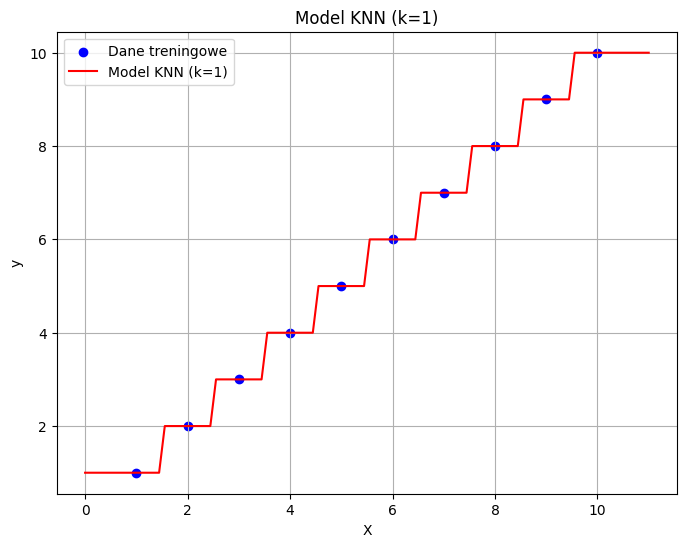

In [6]:
from sklearn.neighbors import KNeighborsRegressor

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X, y)
X_test = np.linspace(0, 11, 100).reshape(-1, 1)
y_pred = knn.predict(X_test)

# Wizualizacja
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Dane treningowe')
plt.plot(X_test, y_pred, color='red', label='Model KNN (k=1)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model KNN (k=1)')
plt.legend()
plt.grid(True)
plt.show()


Model KNeighborsRegressor (KNN) jest jednym z najłatwiejszych do interpretacji modeli regresji, ponieważ opiera się na prostym założeniu: dla nowego punktu przewidywana wartość jest średnią wartości z k najbliższych punktów. Wartość k w tym przypadku definiuje, ile punktów będzie branych pod uwagę przy obliczaniu tej średniej.

Dla tego modelu najłatwiejsze do zrozumienia jest to, że dla każdego punktu, dla którego chcemy przewidzieć wartość, KNN szuka k najbliższych punktów w przestrzeni cech i przypisuje im średnią wartość zmiennej zależnej.

W celu zobrazowania tego, możemy zastosować k=1, co oznacza, że przewidywana wartość będzie po prostu wartością najbliższego punktu.

## Zadanie 9

Oceń zdolność predykcji modeli tego samego rodzaju (te same algorytmy i wartości parametrów), co utworzone wcześniej, używając 10-krotnej kroswalidacji (uwaga). Sporządź i załącz dwa analogiczne wykresy (M1 i M2; możesz pokazać obok siebie wartości tych metryk dla całego zbioru i średnie z kroswalidacji). Czy te rodzaje modeli, które najlepiej sprawdzały się dla całego zbioru danych to te same rodzaje, które najlepiej przewidują wartości atrybutu decyzyjnego na zbiorze testowym?

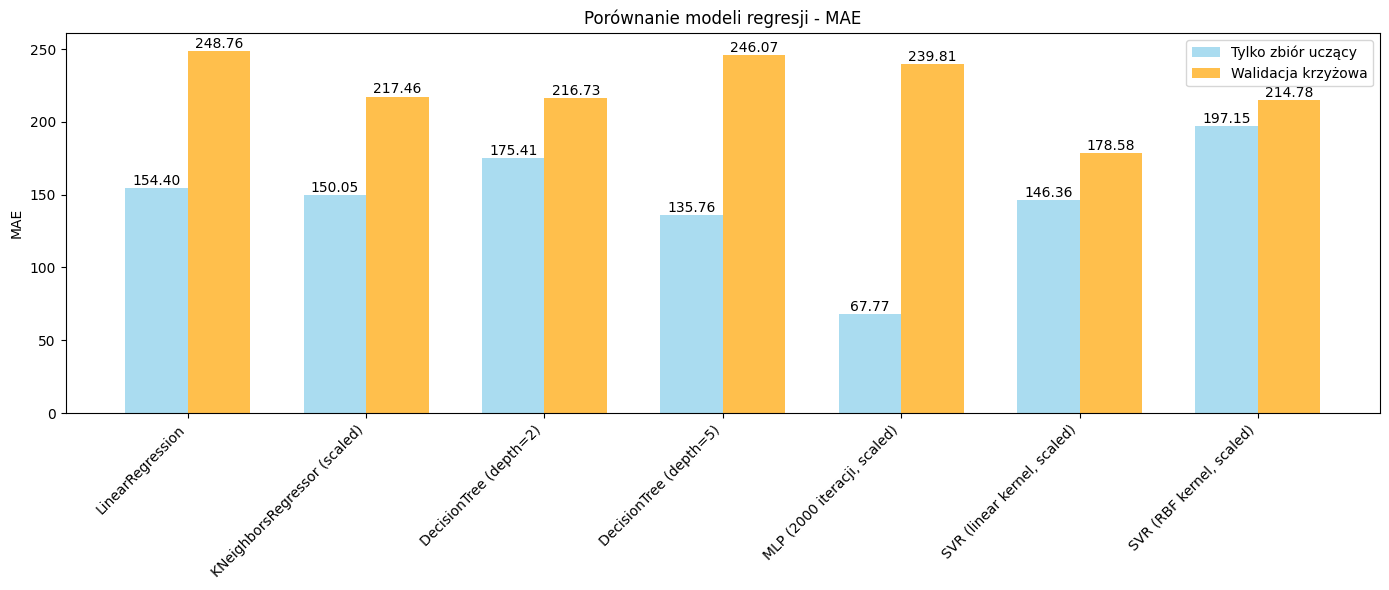

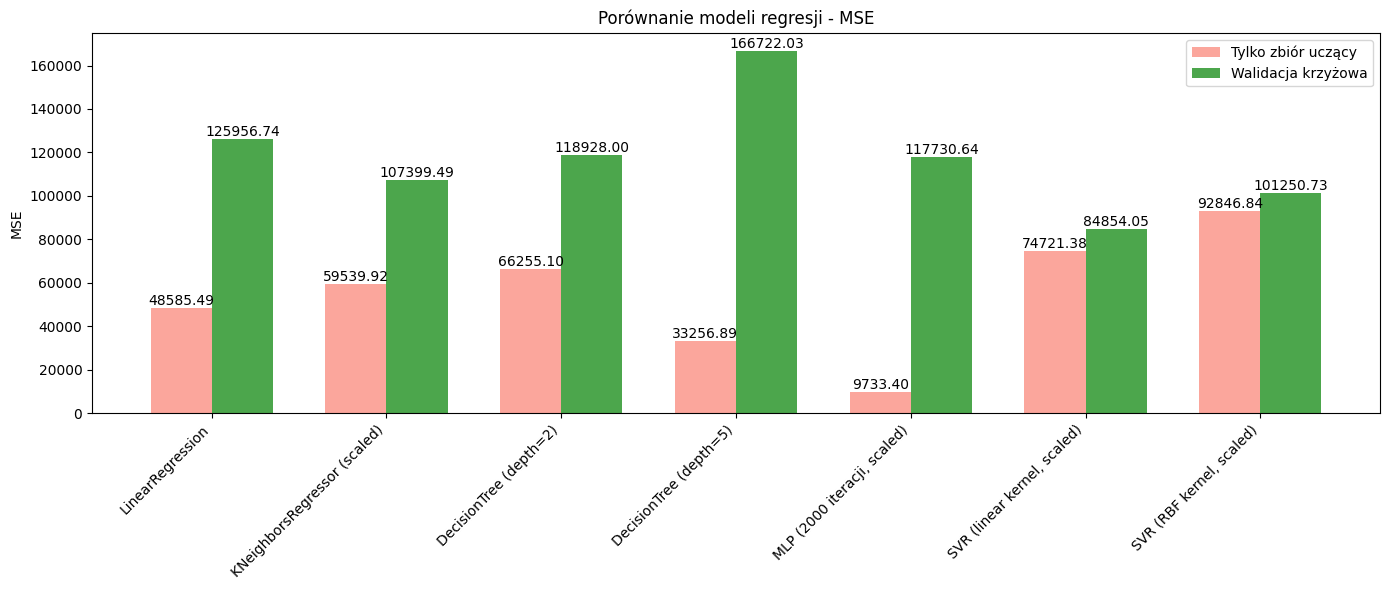

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn import linear_model, neighbors, tree, neural_network, svm

X = dane_df.iloc[:, :-1].values
y = dane_df.iloc[:, -1].values

regresory = {
    "LinearRegression": linear_model.LinearRegression(),
    "KNeighborsRegressor (scaled)": make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor()),
    "DecisionTree (depth=2)": tree.DecisionTreeRegressor(max_depth=2),
    "DecisionTree (depth=5)": tree.DecisionTreeRegressor(max_depth=5),
    "MLP (2000 iteracji, scaled)": make_pipeline(StandardScaler(), neural_network.MLPRegressor(max_iter=2000, random_state=0)),
    "SVR (linear kernel, scaled)": make_pipeline(StandardScaler(), svm.SVR(kernel='linear')),
    "SVR (RBF kernel, scaled)": make_pipeline(StandardScaler(), svm.SVR(kernel='rbf')),
}

def get_scores(model, X, y):
    mae = cross_val_score(model, X, y, cv=10, scoring=make_scorer(mean_absolute_error))
    mse = cross_val_score(model, X, y, cv=10, scoring=make_scorer(mean_squared_error))
    return mae.mean(), mse.mean()

mae_results_cv = {}
mse_results_cv = {}

for name, model in regresory.items():
    mae, mse = get_scores(model, X, y)
    mae_results_cv[name] = mae
    mse_results_cv[name] = mse

mae_results = {}
mse_results = {}

for name, model in regresory.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    mae_results[name] = mean_absolute_error(y, y_pred)
    mse_results[name] = mean_squared_error(y, y_pred)

# Ustalamy szerokość słupków i przesunięcie dla drugiego zestawu słupków
bar_width = 0.35
index = range(len(mae_results))

# Wykres MAE
plt.figure(figsize=(14, 6))
bars1 = plt.bar(index, mae_results.values(), bar_width, color='skyblue', alpha=0.7, label='Tylko zbiór uczący')
bars2 = plt.bar([i + bar_width for i in index], mae_results_cv.values(), bar_width, color='orange', alpha=0.7, label='Walidacja krzyżowa')
plt.ylabel("MAE")
plt.title("Porównanie modeli regresji - MAE")
plt.xticks([i + bar_width / 2 for i in index], mae_results.keys(), rotation=45, ha='right')
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
plt.legend()
plt.tight_layout()
plt.show()

# Wykres MSE
plt.figure(figsize=(14, 6))
bars1 = plt.bar(index, mse_results.values(), bar_width, color='salmon', alpha=0.7, label='Tylko zbiór uczący')
bars2 = plt.bar([i + bar_width for i in index], mse_results_cv.values(), bar_width, color='green', alpha=0.7, label='Walidacja krzyżowa')
plt.ylabel("MSE")
plt.title("Porównanie modeli regresji - MSE")
plt.xticks([i + bar_width / 2 for i in index], mse_results.keys(), rotation=45, ha='right')
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
plt.legend()
plt.tight_layout()
plt.show()


Po zastosowaniu kroswalidacji okazało się, że na zbiorze testowym najlepiej działają modele regresji SVR, a model MLPRegressor dla 2000 iteracji nadal jest jednym z lepszych, ale nie osiąga już takiej przewagi jak wtedy gdy pracował tylko na danych testowych.

Najlepszy wynik osiągnięto dla SVR z kernelem liniowym po normalizacji danych (MAE=178.68, MSE=74721.38).